<a href="https://colab.research.google.com/github/LaiTienQuang/week_14/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
test_path= '/content/drive/MyDrive/projectAI/fruits/test'
train_path= '/content/drive/MyDrive/projectAI/fruits/train'

In [7]:
model=Sequential()
model.add(Conv2D(128,3, activation = 'relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,3, activation = 'relu'))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(5000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics = 'accuracy')

In [9]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.3)
test_data = ImageDataGenerator(rescale = 1./255)
######
train_generator=train_data.flow_from_directory(train_path,
                                                  target_size=(100,100),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')
test_generator=test_data.flow_from_directory(test_path,
                                                  target_size=(100,100),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 2059 images belonging to 10 classes.
Found 2059 images belonging to 10 classes.


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics = 'accuracy')

In [12]:
history=model.fit(train_generator,
                  steps_per_epoch= 50,
                  epochs=10,
                  batch_size=128,
                  validation_data= test_generator,
                  validation_steps=50)

Epoch 1/10
50/50 [==============================] - 845s 17s/step - loss: 1.7653 - accuracy: 0.3894 - val_loss: 1.3794 - val_accuracy: 0.3544
Epoch 2/10
50/50 [==============================] - 178s 4s/step - loss: 1.1091 - accuracy: 0.5978 - val_loss: 0.5883 - val_accuracy: 0.7550
Epoch 3/10
50/50 [==============================] - 42s 845ms/step - loss: 0.8390 - accuracy: 0.6960 - val_loss: 0.4957 - val_accuracy: 0.8031
Epoch 4/10
50/50 [==============================] - 19s 387ms/step - loss: 0.7351 - accuracy: 0.7315 - val_loss: 0.4387 - val_accuracy: 0.8087
Epoch 5/10
50/50 [==============================] - 14s 285ms/step - loss: 0.5849 - accuracy: 0.7758 - val_loss: 0.5439 - val_accuracy: 0.7994
Epoch 6/10
50/50 [==============================] - 13s 265ms/step - loss: 0.4611 - accuracy: 0.8417 - val_loss: 0.1642 - val_accuracy: 0.9450
Epoch 7/10
50/50 [==============================] - 13s 253ms/step - loss: 0.4045 - accuracy: 0.8656 - val_loss: 0.2129 - val_accuracy: 0.9244
Ep

In [16]:
from keras.models import load_model
model.save('fruit_model')

INFO:tensorflow:Assets written to: fruit_model/assets


In [19]:
test_generator.class_indices

{'Apple Braeburn': 0,
 'Apricot': 1,
 'Avocado': 2,
 'Banana': 3,
 'Beetroot': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cherry Rainier': 7,
 'Kiwi': 8,
 'Pear Red': 9}

pear


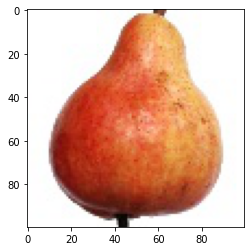

In [32]:
from keras.preprocessing.image import image
img=image.load_img('/content/drive/MyDrive/projectAI/fruits/train/Pear Red/114_100.jpg',target_size=(100,100))
plt.imshow(img)
plt.show
  
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
#val=np.model.predict(images)

val=np.argmax(model.predict(images))

if val==0:
  print('apple')
elif val==1:
  print('apricot')
elif val==2:
  print('avocado')
elif val==3:
  print('banana')
elif val==4:
  print('beetroot')
elif val==5:
  print('Blueberry')
elif val==6:
  print('Cactus fruit')
elif val==7:
  print('Cherry Rainier')
elif val==8:
  print('kiwi')
elif val==9:
  print('pear')